## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [71]:
print("Number of samples in Training are x_train and y_train ",(x_train.shape,y_train.shape))

Number of samples in Training are x_train and y_train  ((60000, 28, 28), (60000,))


In [72]:
print("Number of samples in Test are x_test and y_test",(x_test.shape,y_test.shape))

Number of samples in Test are x_test and y_test ((10000, 28, 28), (10000,))


In [73]:
x_train.dtype, x_test.dtype

(dtype('uint8'), dtype('uint8'))

**Converting Data type to float 32**

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [75]:
x_train.dtype, x_test.dtype

(dtype('float32'), dtype('float32'))

### Find dimensions of an image in the dataset

In [76]:
print('dimensions of an image in the dataset are as ',x_train[0].shape)

dimensions of an image in the dataset are as  (28, 28)


In [77]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [78]:
import pandas as pd
pd.value_counts(y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [79]:
pd.value_counts(y_test)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

Since there are 10 unique categorical values in the dataset i.e 10 class labels

In [0]:
trainY = np_utils.to_categorical(y_train, num_classes=10)
testY = np_utils.to_categorical(y_test, num_classes=10)

In [81]:
# Actual value is as follows
y_train[0]

9

In [82]:
# one hot encoded value is as follows
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255

In [0]:
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [86]:
print("Actual x_train shape is ",x_train.shape)
print("Actual x_test shape is ",x_test.shape)

Actual x_train shape is  (60000, 28, 28)
Actual x_test shape is  (10000, 28, 28)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [88]:
print("Converted x_train shape is ",x_train.shape)
print("Converted x_test shape is ",x_test.shape)

Converted x_train shape is  (60000, 28, 28, 1)
Converted x_test shape is  (10000, 28, 28, 1)


In [90]:
trainY.shape

(60000, 10)

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [98]:
# Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


    # Train the model2
    model.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 472us/step - loss: 0.3733 - acc: 0.8649 - val_loss: 0.3214 - val_acc: 0.8853
Epoch 2/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.2332 - acc: 0.9131 - val_loss: 0.2551 - val_acc: 0.9086
Epoch 3/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1709 - acc: 0.9366 - val_loss: 0.2575 - val_acc: 0.9081
Epoch 4/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.1203 - acc: 0.9554 - val_loss: 0.2473 - val_acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0793 - acc: 0.9707 - val_loss: 0.3030 - val_acc: 0.9145
Epoch 6/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0531 - acc: 0.9809 - val_loss: 0.3428 - val_acc: 0.9186
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [99]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


    # Train the model2
    model2.fit(x_train, trainY, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, testY), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.3956 - acc: 0.8561 - val_loss: 0.3297 - val_acc: 0.8817
Epoch 2/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.2611 - acc: 0.9037 - val_loss: 0.2706 - val_acc: 0.8978
Epoch 3/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.2120 - acc: 0.9213 - val_loss: 0.2363 - val_acc: 0.9124
Epoch 4/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.1768 - acc: 0.9334 - val_loss: 0.2260 - val_acc: 0.9197
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1505 - acc: 0.9439 - val_loss: 0.2291 - val_acc: 0.9235
Epoch 6/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1284 - acc: 0.9523 - val_loss: 0.2460 - val_acc: 0.9196
Epoch 7/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1082 - acc: 0.9591 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

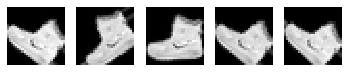

In [101]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [102]:
model2.fit_generator(datagen.flow(x_train, trainY,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, testY), callbacks=callback_list)

Epoch 1/10
   7/1875 [..............................] - ETA: 36s - loss: 3.3211 - acc: 0.4732

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 33s 17ms/step - loss: 0.5096 - acc: 0.8179 - val_loss: 0.2825 - val_acc: 0.9038
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3663 - acc: 0.8658 - val_loss: 0.2842 - val_acc: 0.9031
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3319 - acc: 0.8782 - val_loss: 0.2616 - val_acc: 0.9093
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3098 - acc: 0.8851 - val_loss: 0.2691 - val_acc: 0.9077
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2944 - acc: 0.8917 - val_loss: 0.2826 - val_acc: 0.9086
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2836 - acc: 0.8954 - val_loss: 0.2732 - val_acc: 0.9083
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2739 - acc: 0.8997 - val_loss: 0.2616 - val_acc: 0.9107
Epoch 8/10
1875/1875 [==============================] - 34s

###  Report the final train and validation accuracy

In [103]:
loss_and_metrics = model2.evaluate(x_test, testY)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 86us/step
[0.27319020503759384, 0.904]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [105]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [107]:
print("Number of samples in Training are x_train and y_train ",(x_train.shape,y_train.shape))

Number of samples in Training are x_train and y_train  ((50000, 32, 32, 3), (50000, 1))


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


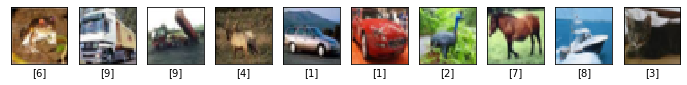

In [148]:
plt.figure(figsize=(12,12))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

In [146]:
x_train[4:5].shape

(1, 32, 32, 3)

Actual Image


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


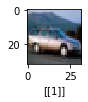

In [153]:
print("Actual Image")
plt.figure(figsize=(1,1))
#plt.plot()
plt.imshow(x_train[4:5][0])
plt.xlabel(y_train[4:5])
plt.show()

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

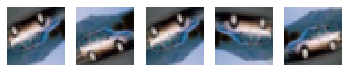

In [130]:
generator = data_gen.flow(x_train[4:5],batch_size=1)
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.axis("off")
  plt.imshow(generator.next().squeeze().astype('uint8'))
  plt.plot()
plt.show()